In [5]:
# Подключаем необходимые библиотеки
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Чтение данных из файла
data = pd.read_csv('car_price_prediction_.csv')

# 1. Заполнение пропусков
imput = SimpleImputer(strategy='mean')  # Используем среднее значение для заполнения
data['Mileage'] = imput.fit_transform(data[['Mileage']])

# 2. Преобразование категориальных данных в числовые
categories = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_vars = one_hot_encoder.fit_transform(data[categories])

# Интеграция закодированных признаков в основной набор данных
encoded_dataframe = pd.DataFrame(encoded_vars, columns=one_hot_encoder.get_feature_names_out(categories))
data = pd.concat([data.drop(categories, axis=1), encoded_dataframe], axis=1)

# 3. Стандартизация числовых данных
scaler = StandardScaler()
data[['Engine Size', 'Mileage']] = scaler.fit_transform(data[['Engine Size', 'Mileage']])

print(data.head())


   Car ID  Year  Engine Size   Mileage     Price  Brand_Audi  Brand_BMW  \
0       1  2016    -0.813848 -0.397234  26613.92         0.0        0.0   
1       2  2018     0.652872 -0.074626  14679.61         0.0        1.0   
2       3  2013     0.722716  0.362347  44402.61         1.0        0.0   
3       4  2011     0.443340 -0.922249  86374.33         0.0        0.0   
4       5  2009    -0.604316  0.833415  73577.10         0.0        0.0   

   Brand_Ford  Brand_Honda  Brand_Mercedes  ...  Model_Model S  Model_Model X  \
0         0.0          0.0             0.0  ...            0.0            1.0   
1         0.0          0.0             0.0  ...            0.0            0.0   
2         0.0          0.0             0.0  ...            0.0            0.0   
3         0.0          0.0             0.0  ...            0.0            0.0   
4         1.0          0.0             0.0  ...            0.0            0.0   

   Model_Model Y  Model_Mustang  Model_Prius  Model_Q5  Model_

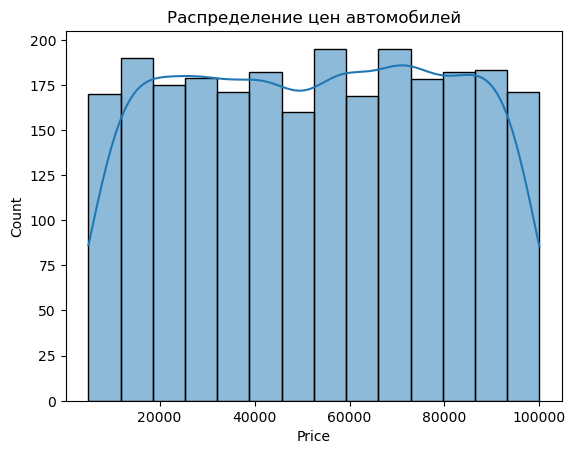

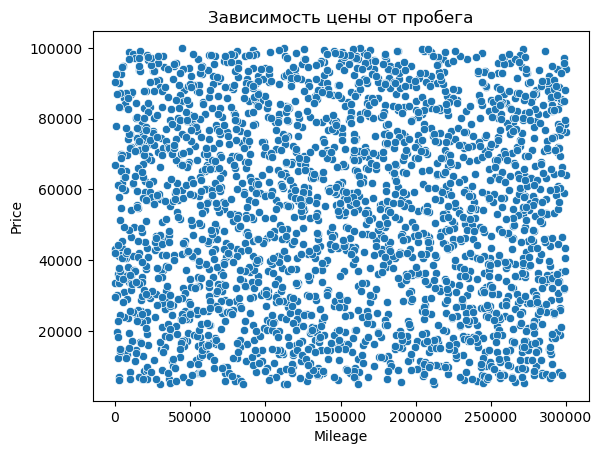

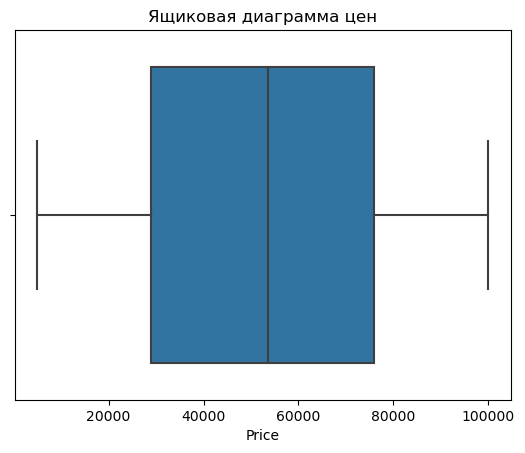

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Построение гистограммы по столбцу Price
sns.histplot(data['Price'], kde=True)
plt.title('Распределение цен автомобилей')
plt.show()

# 2. Диаграмма рассеяния (scatter plot) между Price и Mileage
sns.scatterplot(x='Mileage', y='Price', data=data)
plt.title('Зависимость цены от пробега')
plt.show()

# 3. Ящиковая диаграмма (Box plot) для изучения выбросов по цене
sns.boxplot(x='Price', data=data)
plt.title('Ящиковая диаграмма цен')
plt.show()


In [6]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# 1. Отбор признаков с помощью SelectKBest
X = data.drop('Price', axis=1)
y = data['Price']
select = SelectKBest(score_func=f_regression, k=5)
X_new = select.fit_transform(X, y)
print(f'Выбранные признаки: {select.get_support(indices=True)}')

# 2. Снижение размерности с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f'Доля объясненной дисперсии: {pca.explained_variance_ratio_}')

Выбранные признаки: [ 1 11 20 36 42]
Доля объясненной дисперсии: [9.99895190e-01 9.38057754e-05]


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Пример загрузки данных
data = pd.read_csv('car_price_prediction_.csv')

# Определяем признаки и целевую переменную
X = data.drop(['Price', 'Car ID'], axis=1)  # исключаем целевую переменную и идентификатор
y = data['Price']

# Кодируем категориальные переменные
categorical_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Нормализуем числовые признаки
scaler = StandardScaler()
X[['Engine Size', 'Mileage']] = scaler.fit_transform(X[['Engine Size', 'Mileage']])

# Преобразуем целевую переменную в категории с использованием квантилей
y_binned = pd.qcut(y, q=3, labels=[0, 1, 2])  # 0: низкие цены, 1: средние, 2: высокие

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# 1. Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f'Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_log_reg)}')
print('Confusion Matrix (Logistic Regression):')
print(confusion_matrix(y_test, y_pred_log_reg))

# 2. Дерево решений
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Accuracy (Decision Tree): {accuracy_score(y_test, y_pred_tree)}')
print('Confusion Matrix (Decision Tree):')
print(confusion_matrix(y_test, y_pred_tree))



Accuracy (Logistic Regression): 0.35
Confusion Matrix (Logistic Regression):
[[48 59 49]
 [54 72 51]
 [69 43 55]]
Accuracy (Decision Tree): 0.338
Confusion Matrix (Decision Tree):
[[61 47 48]
 [74 51 52]
 [65 45 57]]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# 1. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}')

# 2. Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f'Accuracy (SVM): {accuracy_score(y_test, y_pred_svm)}')

# 3. Нейронная сеть (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(f'Accuracy (Neural Network): {accuracy_score(y_test, y_pred_mlp)}')


Accuracy (Random Forest): 0.336
Accuracy (SVM): 0.312
Accuracy (Neural Network): 0.37


Logistic Regression Model Evaluation:
Accuracy: 0.35
Precision: 0.35
Recall: 0.35


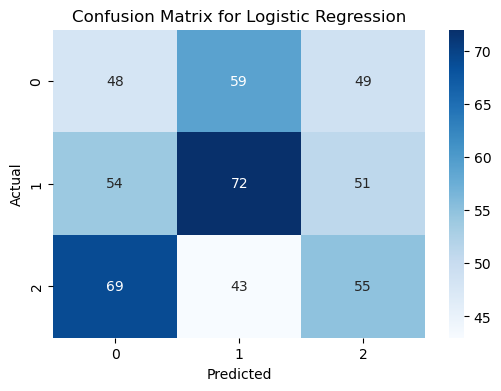

Decision Tree Model Evaluation:
Accuracy: 0.34
Precision: 0.34
Recall: 0.34


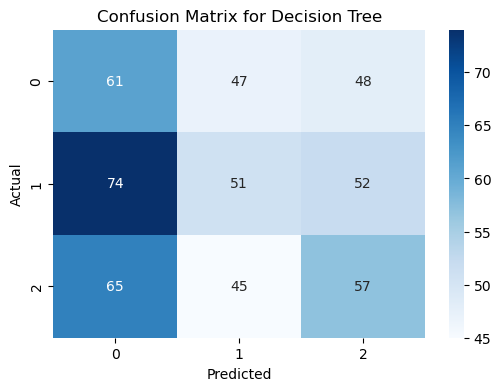

Random Forest Model Evaluation:
Accuracy: 0.34
Precision: 0.34
Recall: 0.34


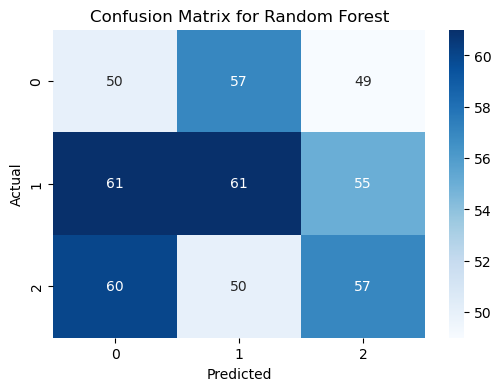

SVM Model Evaluation:
Accuracy: 0.31
Precision: 0.79
Recall: 0.31


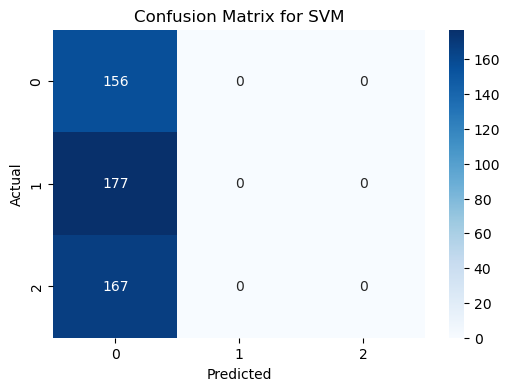

Neural Network Model Evaluation:
Accuracy: 0.37
Precision: 0.60
Recall: 0.37


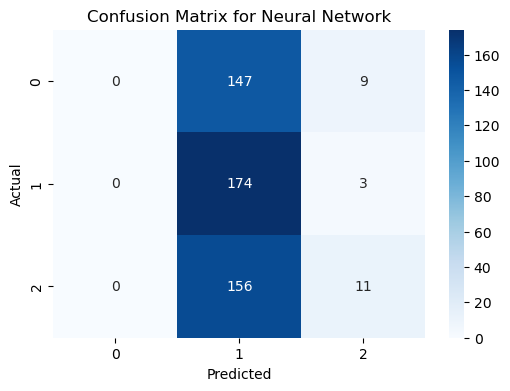

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для вывода метрик и матрицы ошибок
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    
    # Вывод матрицы ошибок
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Оценка Логистической регрессии
evaluate_model("Logistic Regression", log_reg, X_test, y_test)

# Оценка Дерева решений
evaluate_model("Decision Tree", tree, X_test, y_test)

# Оценка Random Forest
evaluate_model("Random Forest", rf, X_test, y_test)

# Оценка SVM
evaluate_model("SVM", svm, X_test, y_test)

# Оценка Нейронной сети (если использовалась)
evaluate_model("Neural Network", mlp, X_test, y_test)
